In [15]:
# gamma Distribution
import math
from scipy.integrate import quad
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [16]:
# function take file path and value seprator
def read_Continues_Data(file_path,sep):
        file = open(file_path,'r')
        input_list =[]
        for line in file:
            input_list.extend(line.split(sep))
            # it use to remove the \n symbol that newline starts
            a  = input_list.pop()
            input_list.append(a[:-1])

        file.close()
        list1 = [round(float(x),3) for x in input_list]
        return list1

#         data = pd.read_csv(file_path,header=None)
#         list1 = data.values.tolist()
#         list2 = []
#         for i in list1:
#             for j in i:
#                 list2.append(j)
        
            
#         return list2
        
    
# plot the scatter plot to understand the data distribution
def scatterPlot(data):
    x = np.array(data)
    y = x[1:]
    x = x[:-1]

    plt.scatter(x, y)
    plt.show()


# Gives the element count in given intervals
def frequency(data,l_limit,u_limit):
        ele_count = 0
        for i in data:
            if i>=l_limit and i<u_limit:
                ele_count +=1
                
        return ele_count
def freq_for_graph(data,intervals):
        min_data = min(data)
        max_data = max(data)
        interval_size = round((max_data - min_data)/intervals,3)
        dic = {}
        for i in range(intervals):
            min_data = min_data + interval_size
            rang = f"({round(min_data - interval_size,3)}-{round(min_data,3)}]"
            l_limit = min_data - interval_size
            u_limit = min_data
            dic[rang] = frequency(data,l_limit,u_limit)
    
        
        if(round(u_limit,3) <= max_data):
            dic[list(dic.keys())[-1]] += 1 
            
        
        display_Freq(dic)
        return dic
        

def display_Freq(result):
        print("      Intervals                    Frequncy  ")
        print("------------------------------------------------------------")
        for (k,v) in result.items():
            print(f"    {k}              {v}     ")
            print("------------------------------------------------------------")


        print(f"        Total                   {sum(result.values())}")
        print("------------------------------------------------------------")

# plotting the histogram
def plot_histogram(dic,intervals):
    x = [i for i in range(1,intervals+1)]
    y = list(dic.values())
    plt.bar(x, y, color='g')
    return None
    
          
# take list of data as input and find the mean
def mean_of_data(data):
    avg = round(sum(data)/len(data),3)
    return avg

# finding variance of data
def variance_of_data(data,avg):
    # variance for sample data (n-1)
    # variance = sum([(i-avg)**2 for i in data])/len(data)-1
    
    # variance of population (n)
    variance = sum([(i-avg)**2 for i in data])/len(data)
    
    return variance

   

# templete for all distributions
# def find_parameters(avg,var):
#     pass
#     return ()

# gamma distribution parameter estimation
def find_gamma_parameters(avg,var):
    
    beta  = round(avg/var,3)
    alpha = round(avg*beta,3)
    
    return (beta,alpha)
    

###### frequency table of  Obeserve frequency(Oi),expected Frequency(Ei),(chi-square(Oi-Ei)^2/Ei) ###########################

# distribution function
def gamma(x):
    fx = (1/(beta**alpha))*gamma_value*(x**(alpha-1))*(math.e**(-x/beta))
    return fx
   
    
# calculating the area under the curve a= lower ,b= higher
def area_Under_Curve(func,a,b,n):
    # height of each small trepezium
    h = abs(b-a)/n
    area = 0 # intilization of area as 0
    
    # calculating and sum of all small-small trapeziums
    for i in range(n):
        A = a + i * h
        B = a + (i + 1) * h
        area += (func(A) + func(B)) * h / 2 

    return area


# function gives the area of given interval on given probability function
# Gives the element count in given intervals
def frequency(data,l_limit,u_limit):
        ele_count = 0
        for i in data:
            if i>=l_limit and i<u_limit:
                ele_count +=1
                
        return ele_count

# print the frequency table of given data
def frequency_table(data,intervals):
    
        min_data = min(data)    
        max_data = max(data)
        
        interval_size = round((max_data - min_data)/intervals,3)
#         dic = {}
        Freq_table = []
        
        for i in range(intervals):
            min_data = min_data + interval_size
            
#             rang = f"({round(min_data - interval_size,3)} - {round(min_data,3)}]"
            
            l_limit = round(min_data - interval_size,3)
            u_limit = round(min_data,3)
            
            # frequency function gives the number of elements in given range 
            Oi = frequency(data,l_limit,u_limit)
            
            # function gives the area of given interval on given probability function
            area = area_Under_Curve(gamma,l_limit,u_limit,10000)
            
            # Expected values for given interval
            Ei = area * len(data)
            
            # putting the Oi ,Ei,area,(Oi-Ei)^2/Ei, l_limit,u_limit
            Freq_table.append([Oi,Ei,area,(((Oi-Ei)**2)/Ei),l_limit,u_limit])
#             dic[rang] =[Oi,Ei,area,(((Oi-Ei)**2)/Ei),l_limit,u_limit]
    
        
        if(round(u_limit,3) <= max_data):
            Freq_table[-1][0] += 1 
        
            
        display(Freq_table)
        return Freq_table


# prints the frequency table
def display(result):
        print("      Intervals \t Frequncy_Oi \t expected Ei \t\t\t area  \t\t\t\t(Oi-Ei)^2/Ei  ")
       
        for item in result:
            print(f"    {item[-2]}-{item[-1]}\t\t{item[0]}\t{item[1]}\t\t{item[2]}\t\t{item[3]}    ")
            
        total_observations = sum([result[i][0] for i in range(len(result))])
        total_expected =  sum([result[i][1] for i in range(len(result))])
        total_area =  sum([result[i][2] for i in range(len(result))])
        summation_chi_square = sum([result[i][3] for i in range(len(result))])
        
       
        print("---------------------------------------------------------------------------------------------------------------------------")
        print(f"      Total \t\t  {total_observations}\t\t{total_expected}\t\t{total_area}\t\t{summation_chi_square}    ")


#calculating the gamma values
def gamma_func(x):
    gamma_value = x**(alpha-1) * math.e**(-x)
    return gamma_value


# merge the intervals on the given threshold frequency

def merge_chi_intervals(chi_data, threshold):
    merged_intervals = []
    current_interval = None
    current_freq_sum = 0
    current_expected_freq_sum = 0
    current_area = 0
#     current_chi_values = 0

    for interval_data in chi_data:
        freq, expected_freq,area,chi_values,lower_bound, upper_bound = interval_data
        if expected_freq < threshold:
            if current_interval is None:
                current_interval = (lower_bound, upper_bound)
                current_freq_sum = freq
                current_expected_freq_sum = expected_freq
                current_area = area
#                 current_chi_values = chi_values
            else:
                current_interval = (current_interval[0], upper_bound)
                current_freq_sum += freq
                current_expected_freq_sum += expected_freq
                current_area += area
#                 current_chi_values += chi_values
        else:
            if current_interval is not None:
                merged_intervals.append([current_freq_sum, current_expected_freq_sum,current_area,(((current_freq_sum - current_expected_freq_sum)**2)/current_expected_freq_sum),current_interval[0], current_interval[1]])
                current_interval = None
                current_freq_sum = 0
                current_expected_freq_sum = 0
                current_area = 0
#                 current_chi_values = 0
            merged_intervals.append([ freq, expected_freq,area,(((freq-expected_freq)**2)/expected_freq),lower_bound, upper_bound])

    if current_interval is not None:
        merged_intervals.append([ current_freq_sum, current_expected_freq_sum,current_area,(((current_freq_sum - current_expected_freq_sum)**2)/current_expected_freq_sum),current_interval[0], current_interval[1]])

    return merged_intervals



Enter file path : n3.csv
Enter file Separator :  ,
0
Minimum of data :   0.156
Maximum of data :   32.316
mean :  6.257
variance :  20.601039503999996


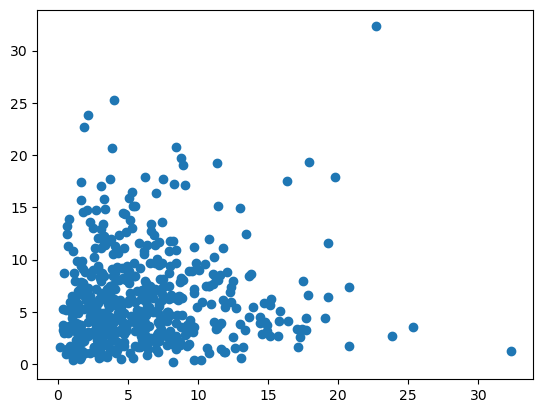

Enter number of intervals : 10
      Intervals                    Frequncy  
------------------------------------------------------------
    (0.156-3.372]              151     
------------------------------------------------------------
    (3.372-6.588]              161     
------------------------------------------------------------
    (6.588-9.804]              103     
------------------------------------------------------------
    (9.804-13.02]              42     
------------------------------------------------------------
    (13.02-16.236]              21     
------------------------------------------------------------
    (16.236-19.452]              14     
------------------------------------------------------------
    (19.452-22.668]              4     
------------------------------------------------------------
    (22.668-25.884]              2     
------------------------------------------------------------
    (25.884-29.1]              0     
----------------

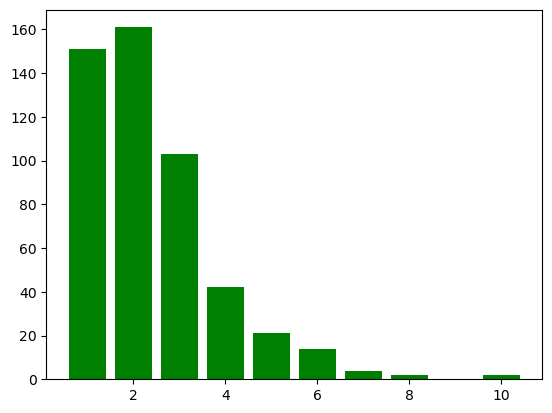

In [17]:
file_path = input("Enter file path : ")
sep = input("Enter file Separator :  ")

# step 1 :- Read the data from file
data = read_Continues_Data(file_path,sep)
print(data.count(20.003))
# min of data
min_of_data = min(data)
print("Minimum of data :  " , min_of_data)

# Max of data
max_of_data = max(data)
print("Maximum of data :  ", max_of_data)

# step 2 :- find the Mean and Variance of data
mean = mean_of_data(data)
print("mean : " , mean)

variance = variance_of_data(data,mean)
print("variance : ",variance)


# data Visualization 
# 1 . scatter Graph
scatterPlot(data)

# Number of intervals
intervals = int(input("Enter number of intervals : "))

# 2. draw bar Graph
dic1 = freq_for_graph(data,intervals)
plot_histogram(dic1,intervals)


In [18]:
# step 2 :- find the Mean and Variance of data
mean = mean_of_data(data)
print("mean : " , mean)

variance = variance_of_data(data,mean)
print("variance : ",variance)

# step 3 :- find out the parameter values
#x,y = find_parameters(mean,variance)

no_parameters = 2
beta,alpha =  find_gamma_parameters(mean,variance)
print("beta : ",beta)
print("alpha : ",alpha)

# gamma = round(area_Under_Curve_for_gamma(0.001,float("inf"),10000),3)      
gamma_value,error = quad(lambda x: x**(alpha-1)*math.exp(-x),0.00001,float("inf"))
# gamma_value = area_Under_Curve(gamma_func,0.01,65535,100000)
print("gamma : ",gamma_value)


# step 4  :- Create frequecy table
intervals = int(input("Enter number of intervals : "))
frequency_Table = frequency_table(data,intervals)

# step 5  :-  merge the intervals on given threshold 
threshold_frequency = 5 
merge_intervals_table = merge_chi_intervals(frequency_Table,threshold_frequency)
print("")
print("###########################################################################################################################",sep="\n\n")
print("After merging intervals : ")
display(merge_intervals_table)
print("")

# Calculate the degree of freedom  formula : No_of_intervals - No_of_parameters -1
No_of_intervals = len(merge_intervals_table)
degree_of_freedom = No_of_intervals - no_parameters - 1
significance_level=0.05
print("Degree of freedom : ",degree_of_freedom)

# calculate chi_squre_value
chi_square_value = sum([merge_intervals_table[i][3] for i in range(len(merge_intervals_table))])
print("Chi-Square value : ",chi_square_value)

# chi_square value in table on given significate level
chi_square_value_in_table = 9.49
print("chi-Square value in table : ",chi_square_value_in_table)

if chi_square_value <= chi_square_value_in_table:
   print("Given data follows the gamma distribution")
else:
   print("Given data doesn't follow the gamma distribution")


mean :  6.257
variance :  20.601039503999996
beta :  3.292
alpha :  1.901
gamma :  0.9621087893936098
Enter number of intervals : 10
      Intervals 	 Frequncy_Oi 	 expected Ei 			 area  				(Oi-Ei)^2/Ei  
    0.156-3.372		152	138.96920149730602		0.27793840299461203		1.2218657644161786    
    3.372-6.588		161	148.82392973460546		0.2976478594692109		0.9961884985311713    
    6.588-9.804		103	89.5580791313204		0.1791161582626408		2.017520232595684    
    9.804-13.02		42	45.819626199151756		0.0916392523983035		0.3184125561791811    
    13.02-16.236		21	21.675304892822552		0.0433506097856451		0.021039459445900976    
    16.236-19.452		14	9.789219916829717		0.019578439833659433		1.8112443135883387    
    19.452-22.668		4	4.287564818034164		0.008575129636068327		0.01928682785696903    
    22.668-25.884		2	1.8373925366653836		0.003674785073330767		0.01439060331664662    
    25.884-29.1		0	0.7746597943813968		0.0015493195887627935		0.7746597943813968    
    29.1-32.316		1	0.3224953140

In [12]:
# function take file path and value seprator
def read_Data(file_path,sep):
#         file = open(file_path,'r')
#         input_list =[]
#         for line in file:
#             input_list.extend(line.split(sep))
#             # it use to remove the \n symbol that newline starts
#             a  = input_list.pop()
#             input_list.append(a[:-1])

#         file.close()
#         list1 = [round(float(x),3) for x in input_list]
#         return list1
        data = pd.read_csv(file_path,header=None)
        list1 = data.values.tolist()
        list2 = []
        for i in list1:
            for j in i:
                list2.append(j)
        
            
        return list2
    

# take list of data as input and find the mean
def mean_of_data(data):
    avg = round(sum(data)/len(data),3)
    return avg

# finding variance of data
def variance_of_data(data,avg):
    # variance for sample data (n-1)
    # variance = sum([(i-avg)**2 for i in data])/len(data)-1
    
    # variance of population (n)
    variance = sum([(i-avg)**2 for i in data])/len(data)
    
    return variance


# templete for all distributions
# def find_parameters(avg,var):
#     pass
#     return ()

# gamma distribution parameter estimation
def find_gamma_parameters(avg,var):
    
    beta  = round(var/avg,3)
    alpha = round(avg/beta,3)
    
    return (beta,alpha)
    

###### frequency table of  Obeserve frequency(Oi),expected Frequency(Ei),(chi-square(Oi-Ei)^2/Ei) ###########################

# distribution function
def gamma(x):
    fx = (1/(beta**alpha))*gamma_value*(x**(alpha-1))*(math.e**(-x/beta))
    return fx
   
    
# calculating the area under the curve a= lower ,b= higher
def area_Under_Curve(func,a,b,n):
    # height of each small trepezium
    h = abs(b-a)/n
    area = 0 # intilization of area as 0
    
    # calculating and sum of all small-small trapeziums
    for i in range(n):
        A = a + i * h
        B = a + (i + 1) * h
        area += (func(A) + func(B)) * h / 2 

    return area


# function gives the area of given interval on given probability function
# Gives the element count in given intervals
def frequency(data,l_limit,u_limit):
        ele_count = 0
        for i in data:
            if i>=l_limit and i<u_limit:
                ele_count +=1
                
        return ele_count

# print the frequency table of given data
def frequency_table(data,intervals):
    
        min_data = min(data)    
        max_data = max(data)
        
        interval_size = round((max_data - min_data)/intervals,3)
#         dic = {}
        Freq_table = []
        
        for i in range(intervals):
            min_data = min_data + interval_size
            
#             rang = f"({round(min_data - interval_size,3)} - {round(min_data,3)}]"
            
            l_limit = round(min_data - interval_size,3)
            u_limit = round(min_data,3)
            
            # frequency function gives the number of elements in given range 
            Oi = frequency(data,l_limit,u_limit)
            
            # function gives the area of given interval on given probability function
            area = area_Under_Curve(gamma,l_limit,u_limit,10000)
            
            # Expected values for given interval
            Ei = area * len(data)
            
            # putting the Oi ,Ei,area,(Oi-Ei)^2/Ei, l_limit,u_limit
            Freq_table.append([Oi,Ei,area,(((Oi-Ei)**2)/Ei),l_limit,u_limit])
#             dic[rang] =[Oi,Ei,area,(((Oi-Ei)**2)/Ei),l_limit,u_limit]
    
        
        if(round(u_limit,3) <= max_data):
            Freq_table[-1][0] += 1 
        
            
        display(Freq_table)
        return Freq_table


# prints the frequency table
def display(result):
        print("      Intervals \t Frequncy_Oi \t expected Ei \t\t\t area  \t\t\t\t(Oi-Ei)^2/Ei  ")
       
        for item in result:
            print(f"    {item[-2]}-{item[-1]}\t\t{item[0]}\t{item[1]}\t\t{item[2]}\t\t{item[3]}    ")
            
        total_observations = sum([result[i][0] for i in range(len(result))])
        total_expected =  sum([result[i][1] for i in range(len(result))])
        total_area =  sum([result[i][2] for i in range(len(result))])
        summation_chi_square = sum([result[i][3] for i in range(len(result))])
        
       
        print("---------------------------------------------------------------------------------------------------------------------------")
        print(f"      Total \t\t  {total_observations}\t\t{total_expected}\t\t{total_area}\t\t{summation_chi_square}    ")


#calculating the gamma values
def gamma_func(x):
    gamma_value = x**(alpha-1) * math.e**(-x)
    return gamma_value


# merge the intervals on the given threshold frequency

def merge_chi_intervals(chi_data, threshold):
    merged_intervals = []
    current_interval = None
    current_freq_sum = 0
    current_expected_freq_sum = 0
    current_area = 0
    current_chi_values = 0

    for interval_data in chi_data:
        freq, expected_freq,area,chi_values,lower_bound, upper_bound = interval_data
        if expected_freq < threshold:
            if current_interval is None:
                current_interval = (lower_bound, upper_bound)
                current_freq_sum = freq
                current_expected_freq_sum = expected_freq
                current_area = area
                current_chi_values = chi_values
            else:
                current_interval = (current_interval[0], upper_bound)
                current_freq_sum += freq
                current_expected_freq_sum += expected_freq
                current_area += area
                current_chi_values += chi_values
        else:
            if current_interval is not None:
                merged_intervals.append([current_freq_sum, current_expected_freq_sum,current_area,current_chi_values,current_interval[0], current_interval[1]])
                current_interval = None
                current_freq_sum = 0
                current_expected_freq_sum = 0
                current_area = 0
                current_chi_values = 0
            merged_intervals.append([ freq, expected_freq,area,chi_values,lower_bound, upper_bound])

    if current_interval is not None:
        merged_intervals.append([ current_freq_sum, current_expected_freq_sum,current_area,current_chi_values,current_interval[0], current_interval[1]])

    return merged_intervals

In [13]:
file_path = 'n4.csv' #input("Enter file path : ")
sep = ","                    #  input("Enter file Separator :  ")

# step 1 :- Read the data from file
data = read_Data(file_path,sep)

# step 2 :- find the Mean and Variance of data
mean = mean_of_data(data)
print("mean : " , mean)

variance = variance_of_data(data,mean)
print("variance : ",variance)

# step 3 :- find out the parameter values
#x,y = find_parameters(mean,variance)

no_parameters = 2
beta,alpha =  find_gamma_parameters(mean,variance)
print("beta : ",beta)
print("alpha : ",alpha)

# gamma = round(area_Under_Curve_for_gamma(0.001,float("inf"),10000),3)      
gamma_value,error = quad(lambda x: x**(alpha-1)*math.exp(-x),0.00001,float("inf"))
# gamma_value = area_Under_Curve(gamma_func,0.01,65535,100000)
print("gamma : ",gamma_value)


# step 4  :- Create frequecy table
intervals = int(input("Enter number of intervals : "))
frequency_Table = frequency_table(data,intervals)

# step 5  :-  merge the intervals on given threshold 
threshold_frequency = 5 
merge_intervals_table = merge_chi_intervals(frequency_Table,threshold_frequency)
print("")
print("###########################################################################################################################",sep="\n\n")
print("After merging intervals : ")
display(merge_intervals_table)
print("")

# Calculate the degree of freedom  formula : No_of_intervals - No_of_parameters -1
No_of_intervals = len(merge_intervals_table)
degree_of_freedom = No_of_intervals - no_parameters - 1
significance_level=0.05
print("Degree of freedom : ",degree_of_freedom)

# calculate chi_squre_value
chi_square_value = sum([merge_intervals_table[i][3] for i in range(len(merge_intervals_table))])
print("Chi-Square value : ",chi_square_value)

# chi_square value in table on given significate level
chi_square_value_in_table = 9.49
print("chi-Square value in table : ",chi_square_value_in_table)

if chi_square_value <= chi_square_value_in_table:
   print("Given data follows the gamma distribution")
else:
   print("Given data doesn't follow the gamma distribution")


mean :  2.908
variance :  8.477515797374725
beta :  2.915
alpha :  0.998
gamma :  1.0011481414471306
Enter number of intervals : 10
      Intervals 	 Frequncy_Oi 	 expected Ei 			 area  				(Oi-Ei)^2/Ei  
    0.003-2.003		240	249.02895475282455		0.4980579095056491		0.3273596197256188    
    2.003-4.003		132	125.01564973874609		0.2500312994774922		0.39020033630844536    
    4.003-6.003		66	62.8816821130134		0.1257633642260268		0.15463814130837672    
    6.003-8.003		32	31.64107132632378		0.06328214265264756		0.0040716002141113145    
    8.003-10.003		15	15.924155798805105		0.03184831159761021		0.05363323188091309    
    10.003-12.003		7	8.015070809517262		0.016030141619034523		0.1285539170921045    
    12.003-14.003		2	4.0344874401944		0.008068974880388801		1.0259392811765256    
    14.003-16.003		2	2.0309099505262553		0.004061819901052511		0.00047044185355829294    
    16.003-18.003		1	1.0223717779976729		0.0020447435559953456		0.0004895444705617639    
    18.003-20.003		2	0.5